lichess_db_standard_rated_2013-01.pgn.zst: 92811021 bytes 


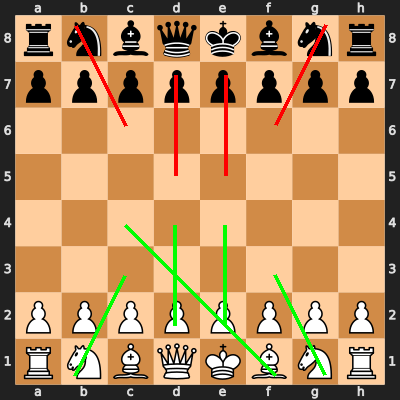

Top White Opening Moves:
e4: 37 times
Nf3: 29 times
d4: 27 times
Nc3: 16 times
Bc4: 14 times

Top Black Opening Moves:
Nxf6+: 22 times
dxd5: 21 times
Nxc6: 21 times
exe5: 20 times
exe6: 17 times


In [5]:
# --- Step 1: Install necessary libraries ---
!pip install python-chess cairosvg pillow --quiet
!apt-get install zstd -y -qq

# --- Step 2: Download sample Lichess PGN dataset ---
!wget -q https://database.lichess.org/standard/lichess_db_standard_rated_2013-01.pgn.zst -O lichess_db_standard_rated_2013-01.pgn.zst
!zstd -d -f lichess_db_standard_rated_2013-01.pgn.zst -o lichess_sample.pgn

# --- Step 3: Import libraries ---
import chess.pgn
import chess.svg
from cairosvg import svg2png
from io import BytesIO
from PIL import Image, ImageDraw
from collections import Counter
from IPython.display import display

# --- USER SETTINGS ---
input_file = "lichess_sample.pgn"
num_games_to_process = 50   # Number of games to analyze
opening_moves = 5           # Number of moves from start to consider

# --- Step 4: Collect first moves from games ---
white_first_moves = []
black_first_moves = []

with open(input_file, encoding='utf-8') as pgn:
    for _ in range(num_games_to_process):
        game = chess.pgn.read_game(pgn)
        if game is None:
            break
        board = game.board()
        for i, move in enumerate(game.mainline_moves()):
            if i >= opening_moves * 2:  # Only first N moves per side
                break
            if i % 2 == 0:
                white_first_moves.append(move)
            else:
                black_first_moves.append(move)

# --- Step 5: Count frequency of each move ---
white_counter = Counter(white_first_moves)
black_counter = Counter(black_first_moves)

# --- Step 6: Visualize top moves on the chessboard ---
def draw_board_with_arrows(top_moves_white, top_moves_black):
    board = chess.Board()
    img = Image.new("RGBA", (400, 400), (255,255,255,255))

    # Draw board SVG
    svg_board = chess.svg.board(board=board, size=400)
    png_image = BytesIO()
    svg2png(bytestring=svg_board, write_to=png_image)
    png_image.seek(0)
    img = Image.open(png_image).convert("RGBA")

    draw = ImageDraw.Draw(img)

    # Function to convert square to coordinates
    def square_to_coord(square):
        row = 7 - (square // 8)
        col = square % 8
        cell_size = 50
        x = col * cell_size + cell_size//2
        y = row * cell_size + cell_size//2
        return (x, y)

    # Draw arrows for white
    for move, count in top_moves_white:
        start = square_to_coord(move.from_square)
        end = square_to_coord(move.to_square)
        draw.line([start, end], fill=(0, 255, 0, 255), width=4)  # green arrows

    # Draw arrows for black
    for move, count in top_moves_black:
        start = square_to_coord(move.from_square)
        end = square_to_coord(move.to_square)
        draw.line([start, end], fill=(255, 0, 0, 255), width=4)  # red arrows

    return img

# --- Step 7: Get top 5 most frequent moves for each side ---
top_white_moves = white_counter.most_common(5)
top_black_moves = black_counter.most_common(5)

# --- Step 8: Generate and display the board ---
img = draw_board_with_arrows(top_white_moves, top_black_moves)
display(img)

# --- Optional: Print top moves with counts ---
print("Top White Opening Moves:")
for move, count in top_white_moves:
    print(f"{chess.Board().san(move)}: {count} times")

print("\nTop Black Opening Moves:")
for move, count in top_black_moves:
    print(f"{chess.Board().san(move)}: {count} times")


In [4]:
from PIL import Image, ImageDraw, ImageFont


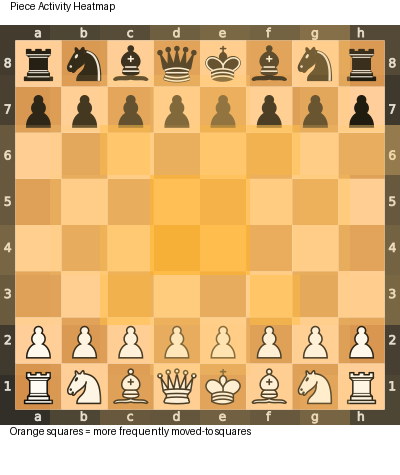

In [6]:
# --- Imports ---
import chess.pgn
import chess.svg
from cairosvg import svg2png
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
from IPython.display import display

# --- Settings ---
input_file = "lichess_sample.pgn"
num_games_to_process = 50
heatmap_scale = 200
cell_size = 50

# --- Helper Functions ---
def square_to_coord(square, cell_size=50):
    row = 7 - (square // 8)
    col = square % 8
    x = col * cell_size
    y = row * cell_size
    return x, y

def generate_base_board():
    board = chess.Board()
    svg_board = chess.svg.board(board=board, size=400)
    png_image = BytesIO()
    svg2png(bytestring=svg_board, write_to=png_image)
    png_image.seek(0)
    return Image.open(png_image).convert("RGBA")

def add_title_and_legend(img, title, legend_text):
    font = ImageFont.load_default()
    title_height = 25
    legend_height = 50
    total_height = img.height + title_height + legend_height
    new_img = Image.new("RGBA", (img.width, total_height), (255, 255, 255, 255))
    new_img.paste(img, (0, title_height))
    draw = ImageDraw.Draw(new_img)
    draw.text((10, 0), title, fill="black", font=font)
    draw.text((10, img.height + title_height), legend_text, fill="black", font=font)
    return new_img

# --- Process games ---
square_activity = Counter()
with open(input_file, encoding='utf-8') as pgn:
    for _ in range(num_games_to_process):
        game = chess.pgn.read_game(pgn)
        if game is None:
            break
        board = game.board()
        for move in game.mainline_moves():
            square_activity[move.to_square] += 1
            board.push(move)

# --- Generate heatmap board ---
img_heatmap = generate_base_board()
max_count = max(square_activity.values()) if square_activity else 1

for square, count in square_activity.items():
    x, y = square_to_coord(square)
    intensity = int((count / max_count) * heatmap_scale)
    overlay = Image.new("RGBA", (cell_size, cell_size), (255, 165, 0, intensity))
    img_heatmap.paste(overlay, (x, y), overlay)

legend_text = "Orange squares = more frequently moved-to squares"
img_heatmap = add_title_and_legend(img_heatmap, "Piece Activity Heatmap", legend_text)
display(img_heatmap)


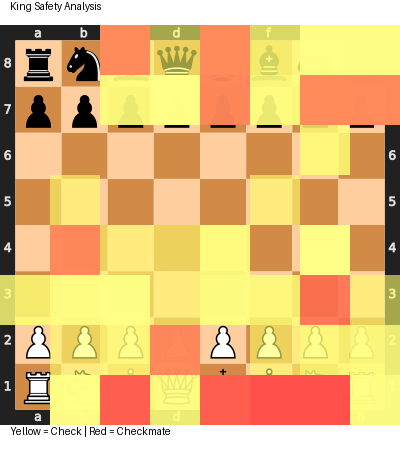

In [7]:
# --- Imports ---
import chess.pgn
import chess.svg
from cairosvg import svg2png
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# --- Settings ---
input_file = "lichess_sample.pgn"
num_games_to_process = 50
cell_size = 50

# --- Helper Functions ---
def square_to_coord(square, cell_size=50):
    row = 7 - (square // 8)
    col = square % 8
    x = col * cell_size
    y = row * cell_size
    return x, y

def generate_base_board():
    board = chess.Board()
    svg_board = chess.svg.board(board=board, size=400)
    png_image = BytesIO()
    svg2png(bytestring=svg_board, write_to=png_image)
    png_image.seek(0)
    return Image.open(png_image).convert("RGBA")

def add_title_and_legend(img, title, legend_text):
    font = ImageFont.load_default()
    title_height = 25
    legend_height = 50
    total_height = img.height + title_height + legend_height
    new_img = Image.new("RGBA", (img.width, total_height), (255, 255, 255, 255))
    new_img.paste(img, (0, title_height))
    draw = ImageDraw.Draw(new_img)
    draw.text((10, 0), title, fill="black", font=font)
    draw.text((10, img.height + title_height), legend_text, fill="black", font=font)
    return new_img

# --- Process games ---
check_squares = []
checkmate_squares = []

with open(input_file, encoding='utf-8') as pgn:
    for _ in range(num_games_to_process):
        game = chess.pgn.read_game(pgn)
        if game is None:
            break
        board = game.board()
        for move in game.mainline_moves():
            board.push(move)
            if board.is_checkmate():
                checkmate_squares.append(board.king(not board.turn))
            elif board.is_check():
                check_squares.append(board.king(not board.turn))

# --- Generate King Safety Board ---
img_king = generate_base_board()

for sq in check_squares:
    x, y = square_to_coord(sq)
    overlay = Image.new("RGBA", (cell_size, cell_size), (255, 255, 0, 120))  # yellow
    img_king.paste(overlay, (x, y), overlay)

for sq in checkmate_squares:
    x, y = square_to_coord(sq)
    overlay = Image.new("RGBA", (cell_size, cell_size), (255, 0, 0, 180))  # red
    img_king.paste(overlay, (x, y), overlay)

legend_text = "Yellow = Check | Red = Checkmate"
img_king = add_title_and_legend(img_king, "King Safety Analysis", legend_text)
display(img_king)


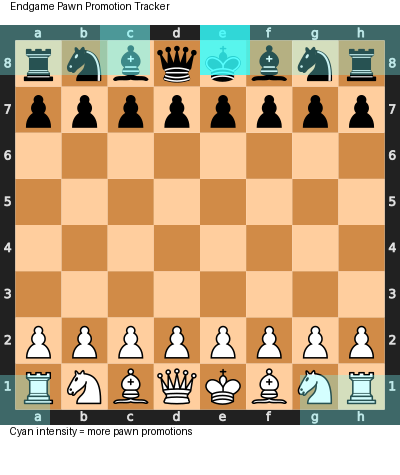

In [10]:
# --- Imports ---
import chess.pgn
import chess.svg
from cairosvg import svg2png
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
from IPython.display import display

# --- Settings ---
input_file = "lichess_sample.pgn"
num_games_to_process = 50
cell_size = 50

# --- Helper Functions ---
def square_to_coord(square, cell_size=50):
    row = 7 - (square // 8)
    col = square % 8
    x = col * cell_size
    y = row * cell_size
    return x, y

def generate_base_board():
    board = chess.Board()
    svg_board = chess.svg.board(board=board, size=400)
    png_image = BytesIO()
    svg2png(bytestring=svg_board, write_to=png_image)
    png_image.seek(0)
    return Image.open(png_image).convert("RGBA")

def add_title_and_legend(img, title, legend_text):
    font = ImageFont.load_default()
    title_height = 25
    legend_height = 50
    total_height = img.height + title_height + legend_height
    new_img = Image.new("RGBA", (img.width, total_height), (255,255,255,255))
    new_img.paste(img, (0, title_height))
    draw = ImageDraw.Draw(new_img)
    draw.text((10, 0), title, fill="black", font=font)
    draw.text((10, img.height + title_height), legend_text, fill="black", font=font)
    return new_img

# --- Process games ---
promotion_squares = Counter()

with open(input_file, encoding='utf-8') as pgn:
    for _ in range(num_games_to_process):
        game = chess.pgn.read_game(pgn)
        if game is None:
            break
        board = game.board()
        for move in game.mainline_moves():
            if board.piece_at(move.from_square) and board.piece_at(move.from_square).piece_type == chess.PAWN:
                if chess.square_rank(move.to_square) == 0 or chess.square_rank(move.to_square) == 7:
                    promotion_squares[move.to_square] += 1
            board.push(move)

# --- Generate board ---
img_promotion = generate_base_board()
max_count = max(promotion_squares.values()) if promotion_squares else 1

for sq, count in promotion_squares.items():
    x, y = square_to_coord(sq)
    intensity = int((count / max_count) * 200)
    overlay = Image.new("RGBA", (cell_size, cell_size), (0,255,255,intensity))
    img_promotion.paste(overlay, (x, y), overlay)

legend_text = "Cyan intensity = more pawn promotions"
img_promotion = add_title_and_legend(img_promotion, "Endgame Pawn Promotion Tracker", legend_text)
display(img_promotion)


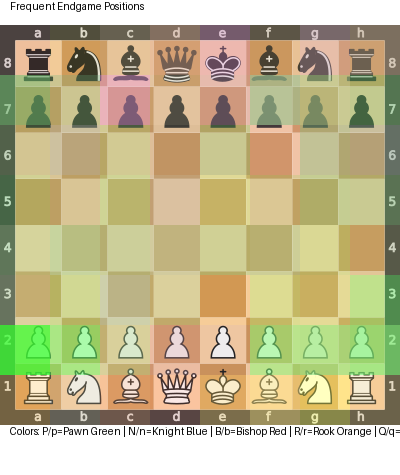

In [11]:
# --- Imports ---
import chess.pgn
import chess.svg
from cairosvg import svg2png
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
from IPython.display import display

# --- Settings ---
input_file = "lichess_sample.pgn"
num_games_to_process = 50
min_endgame_move = 40  # Only consider games reaching this move or more
cell_size = 50

# --- Helper Functions ---
def square_to_coord(square, cell_size=50):
    """Convert chess square index to pixel coordinates on image."""
    row = 7 - (square // 8)  # invert y-axis for image
    col = square % 8
    x = col * cell_size
    y = row * cell_size
    return x, y

def generate_base_board():
    """Generate an empty chessboard image as base."""
    board = chess.Board()
    svg_board = chess.svg.board(board=board, size=400)
    png_image = BytesIO()
    svg2png(bytestring=svg_board, write_to=png_image)
    png_image.seek(0)
    return Image.open(png_image).convert("RGBA")

def add_title_and_legend(img, title, legend_text):
    """Add a title and legend to the image."""
    font = ImageFont.load_default()
    title_height = 25
    legend_height = 50
    total_height = img.height + title_height + legend_height
    new_img = Image.new("RGBA", (img.width, total_height), (255,255,255,255))
    new_img.paste(img, (0, title_height))
    draw = ImageDraw.Draw(new_img)
    draw.text((10, 0), title, fill="black", font=font)
    draw.text((10, img.height + title_height), legend_text, fill="black", font=font)
    return new_img

# --- Process PGN games ---
piece_positions = Counter()  # Count piece occurrences per square

with open(input_file, encoding='utf-8') as pgn:
    for game_index in range(num_games_to_process):
        game = chess.pgn.read_game(pgn)
        if game is None:
            break
        board = game.board()
        moves = list(game.mainline_moves())
        if len(moves) < min_endgame_move:
            continue  # skip short games
        # Apply all moves
        for move in moves:
            board.push(move)
        # Record piece positions at endgame
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece:
                piece_positions[(piece.symbol(), square)] += 1

# --- Generate heatmap board ---
img_endgame = generate_base_board()
max_count = max(piece_positions.values()) if piece_positions else 1

for (piece, sq), count in piece_positions.items():
    x, y = square_to_coord(sq)
    # Color intensity proportional to frequency
    intensity = int((count / max_count) * 200)
    color = {
        'P': (0,255,0,intensity),   # White pawn = green
        'p': (0,128,0,intensity),
        'N': (0,0,255,intensity),   # White knight = blue
        'n': (0,0,128,intensity),
        'B': (255,0,0,intensity),   # White bishop = red
        'b': (128,0,0,intensity),
        'R': (255,165,0,intensity), # White rook = orange
        'r': (128,82,0,intensity),
        'Q': (255,0,255,intensity), # White queen = magenta
        'q': (128,0,128,intensity),
        'K': (255,255,0,intensity), # White king = yellow
        'k': (128,128,0,intensity)
    }.get(piece, (0,0,0,intensity))
    overlay = Image.new("RGBA", (cell_size, cell_size), color)
    img_endgame.paste(overlay, (x, y), overlay)

# --- Add title and legend ---
legend_text = ("Colors: P/p=Pawn Green | N/n=Knight Blue | B/b=Bishop Red | "
               "R/r=Rook Orange | Q/q=Queen Magenta | K/k=King Yellow | "
               "Intensity = more frequent occupancy")
img_endgame = add_title_and_legend(img_endgame, "Frequent Endgame Positions", legend_text)

# --- Display final board ---
display(img_endgame)
